# Seattle Rain Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge , Lasso , ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import mean_squared_error

In [2]:
data=pd.read_csv("../input/did-it-rain-in-seattle-19482017/seattleWeather_1948-2017.csv")

In [3]:
data

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [5]:
data.isnull()

,DATE,PRCP,TMAX,TMIN,RAIN
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
25546,False,False,False,False,False
25547,False,False,False,False,False
25548,False,False,False,False,False
25549,False,False,False,False,False


In [6]:
data.isnull().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [7]:
dt=data.dropna()

In [8]:
dt.isnull().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

In [9]:
le = LabelEncoder() 

In [10]:
dt["RAIN"] = le.fit_transform(dt["RAIN"])
dt

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,1
1,1948-01-02,0.59,45,36,1
2,1948-01-03,0.42,45,35,1
3,1948-01-04,0.31,45,34,1
4,1948-01-05,0.17,45,32,1
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,0
25547,2017-12-11,0.00,49,29,0
25548,2017-12-12,0.00,46,32,0
25549,2017-12-13,0.00,48,34,0


In [11]:
ftr=pd.DataFrame(list(dt.columns)).drop([0, 4] ).rename(columns={0: 'ozntlk'} , index={1: 0 , 2:1 , 3:2})
a=[0,1,2]
b=["ortalama" , "Standart Sapma"]
c=["ust_limit" , "alt_limit"]
for i in a:
    print(str(ftr.iat[i,0]), b[0] , np.array(dt[ftr.iat[i,0]]).mean())
    print(str(ftr.iat[i,0]) , b[1] ,np.array(dt[ftr.iat[i,0]]).std())
    print(str(ftr.iat[i,0]), c[0] , np.array(dt[ftr.iat[i,0]]).mean() + 3*np.array(dt[ftr.iat[i,0]]).std())
    print(str(ftr.iat[i,0]), c[1] , np.array(dt[ftr.iat[i,0]]).mean() - 3*np.array(dt[ftr.iat[i,0]]).std())

PRCP ortalama 0.10622162204477847
PRCP Standart Sapma 0.23902678090011983
PRCP ust_limit 0.823301964745138
PRCP alt_limit -0.610858720655581
TMAX ortalama 59.54305620792234
TMAX Standart Sapma 12.773014512043819
TMAX ust_limit 97.86209974405381
TMAX alt_limit 21.22401267179088
TMIN ortalama 44.513386566463126
TMIN Standart Sapma 8.892844563416434
TMIN ust_limit 71.19192025671242
TMIN alt_limit 17.834852876213823


In [12]:
dscs = dt.describe().T
variances=pd.DataFrame(dt.var()).rename(columns={0: "variance"})
skewness=pd.DataFrame(dt.skew()).rename(columns={0: "skewness"})
kurtosiss=pd.DataFrame(dt.kurtosis()).rename(columns={0: "kurtosis"})
descriptive_statistics=pd.concat([dscs,variances,skewness,kurtosiss], axis=1)
descriptive_statistics

,count,mean,std,min,25%,50%,75%,max,variance,skewness,kurtosis
PRCP,25548.0,0.106222,0.239031,0.0,0.0,0.0,0.1,5.02,0.057136,4.416097,32.990118
TMAX,25548.0,59.543056,12.773265,4.0,50.0,58.0,69.0,103.00,163.156286,0.249230,-0.442026
TMIN,25548.0,44.513387,8.893019,0.0,38.0,45.0,52.0,71.00,79.085780,-0.340349,-0.088382
RAIN,25548.0,0.426648,0.494600,0.0,0.0,0.0,1.0,1.00,0.244629,0.296635,-1.912157


In [13]:
dt.cov()

,PRCP,TMAX,TMIN,RAIN
PRCP,0.057136,-0.692273,-0.136822,0.060905
TMAX,-0.692273,163.156286,97.766559,-2.459088
TMIN,-0.136822,97.766559,79.085780,-0.615372
RAIN,0.060905,-2.459088,-0.615372,0.244629


In [14]:
dt.corr()

,PRCP,TMAX,TMIN,RAIN
PRCP,1.000000,-0.226736,-0.064365,0.515160
TMAX,-0.226736,1.000000,0.860675,-0.389241
TMIN,-0.064365,0.860675,1.000000,-0.139905
RAIN,0.515160,-0.389241,-0.139905,1.000000


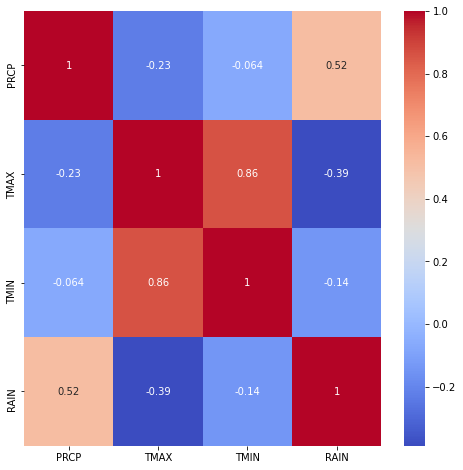

In [15]:
plt.figure(figsize=(8,8))
sns.heatmap(dt.corr() , annot=True , cmap="coolwarm");

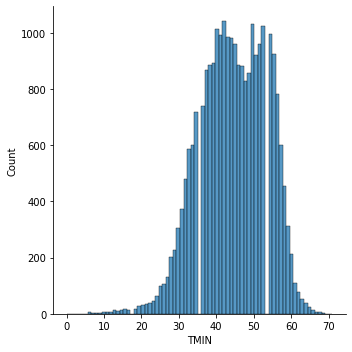

In [16]:
sns.displot(x="TMIN" , data=dt )

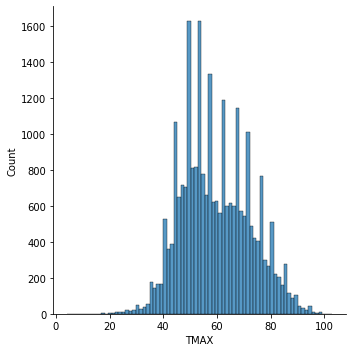

In [17]:
sns.displot(x="TMAX" , data=dt )

<AxesSubplot:xlabel='TMIN'>

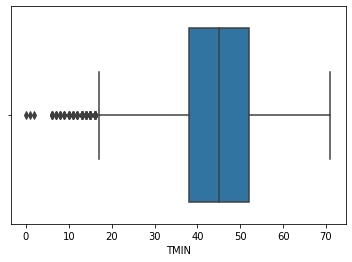

In [18]:
sns.boxplot(x=dt.TMIN)

<AxesSubplot:xlabel='TMAX'>

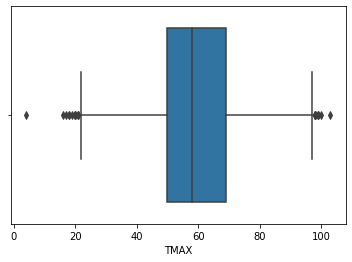

In [19]:
sns.boxplot(x=dt.TMAX)

<AxesSubplot:xlabel='TMAX', ylabel='Count'>

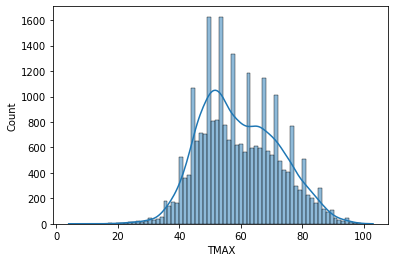

In [20]:
sns.histplot(data=dt , x=dt.TMAX, kde=True)

<AxesSubplot:xlabel='TMAX', ylabel='Count'>

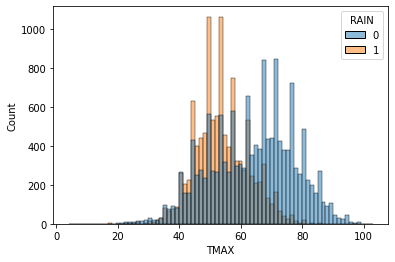

In [21]:
sns.histplot(data=dt , x=dt.TMAX, hue=dt.RAIN)

<AxesSubplot:xlabel='TMIN', ylabel='Density'>

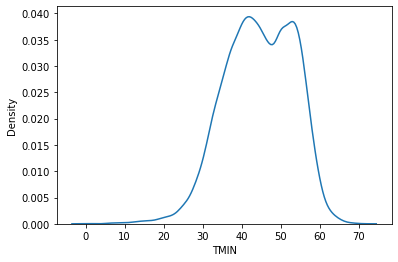

In [22]:
sns.kdeplot(data=dt , x=dt.TMIN)

<AxesSubplot:xlabel='TMAX', ylabel='Density'>

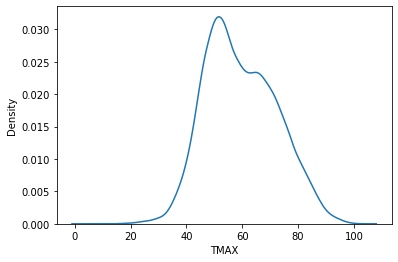

In [23]:
sns.kdeplot(data=dt , x=dt.TMAX)

<AxesSubplot:xlabel='PRCP', ylabel='Density'>

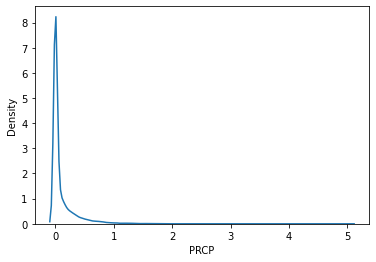

In [24]:
sns.kdeplot(data=dt , x=dt.PRCP)

<AxesSubplot:xlabel='TMAX', ylabel='Density'>

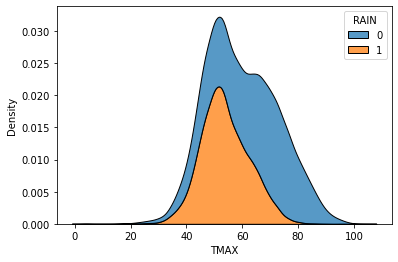

In [25]:
sns.kdeplot(data=dt , x=dt.TMAX , hue=dt.RAIN , multiple="stack")

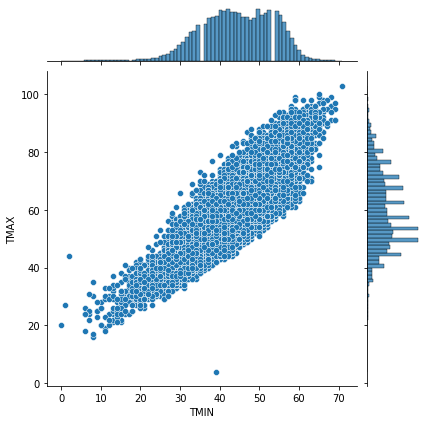

In [26]:
sns.jointplot(data=dt , x=dt.TMIN , y=dt.TMAX)

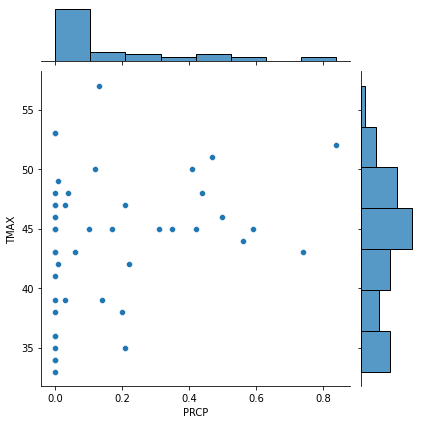

In [27]:
sns.jointplot(data=dt , x=dt.head(50).PRCP , y=dt.head(50).TMAX)

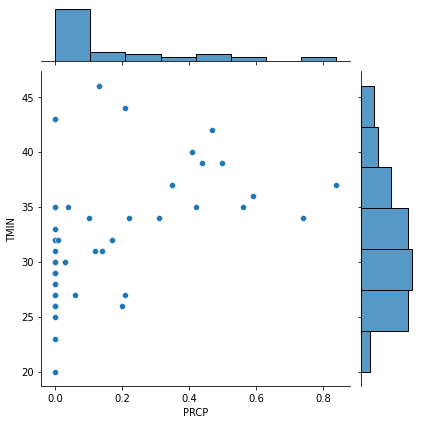

In [28]:
sns.jointplot(data=dt , x=dt.head(50).PRCP , y=dt.head(50).TMIN)

<AxesSubplot:xlabel='TMIN', ylabel='TMAX'>

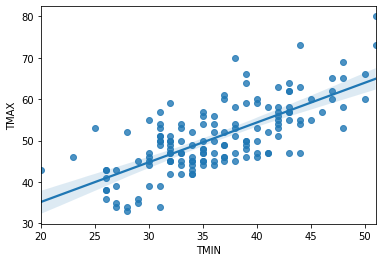

In [29]:
sns.regplot(x=dt.head(150).TMIN , y=dt.head(150).TMAX , data=dt)

<AxesSubplot:xlabel='TMIN', ylabel='PRCP'>

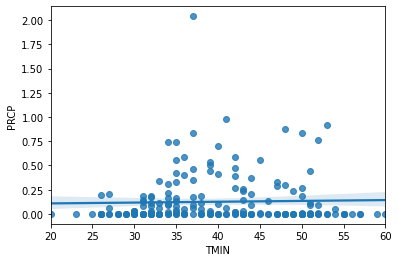

In [30]:
sns.regplot(x=dt.head(200).TMIN , y=dt.head(200).PRCP , data=dt)

<AxesSubplot:xlabel='TMAX', ylabel='PRCP'>

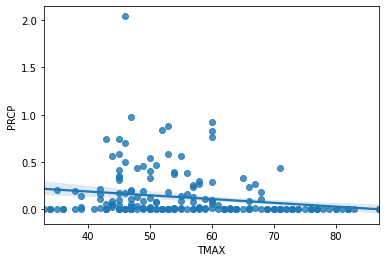

In [31]:
sns.regplot(x=dt.head(200).TMAX , y=dt.head(200).PRCP , data=dt)

<AxesSubplot:xlabel='RAIN', ylabel='count'>

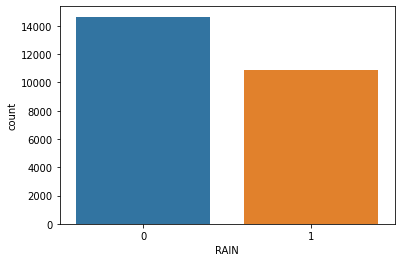

In [32]:
sns.countplot(x=dt.RAIN, data=dt)

In [33]:
dt["DATE"] = pd.to_datetime(dt["DATE"])
dt["YEAR"] = dt["DATE"].apply(lambda x:x.year)
dt["MONTH"] = dt["DATE"].apply(lambda x:x.month)
dt["DAY"] = dt["DATE"].apply(lambda x:x.day)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [34]:
dtf = dt.drop("DATE" , axis=1)
dtf

,PRCP,TMAX,TMIN,RAIN,YEAR,MONTH,DAY
0,0.47,51,42,1,1948,1,1
1,0.59,45,36,1,1948,1,2
2,0.42,45,35,1,1948,1,3
3,0.31,45,34,1,1948,1,4
4,0.17,45,32,1,1948,1,5
...,...,...,...,...,...,...,...
25546,0.00,49,34,0,2017,12,10
25547,0.00,49,29,0,2017,12,11
25548,0.00,46,32,0,2017,12,12
25549,0.00,48,34,0,2017,12,13


In [35]:
clf = LocalOutlierFactor(n_neighbors=5)
pred = clf.fit_predict(dtf)
df = dtf[pred == 1 ]
df

,PRCP,TMAX,TMIN,RAIN,YEAR,MONTH,DAY
0,0.47,51,42,1,1948,1,1
1,0.59,45,36,1,1948,1,2
2,0.42,45,35,1,1948,1,3
3,0.31,45,34,1,1948,1,4
4,0.17,45,32,1,1948,1,5
...,...,...,...,...,...,...,...
25546,0.00,49,34,0,2017,12,10
25547,0.00,49,29,0,2017,12,11
25548,0.00,46,32,0,2017,12,12
25549,0.00,48,34,0,2017,12,13


In [36]:
y = df["PRCP"]

In [37]:
x = df.drop(["PRCP"] , axis=1)

In [38]:
y.head(5)

0    0.47
1    0.59
2    0.42
3    0.31
4    0.17
Name: PRCP, dtype: float64

In [39]:
x.head(5)

,TMAX,TMIN,RAIN,YEAR,MONTH,DAY
0,51,42,1,1948,1,1
1,45,36,1,1948,1,2
2,45,35,1,1948,1,3
3,45,34,1,1948,1,4
4,45,32,1,1948,1,5


In [40]:
scaler = StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x) , columns=x.columns)
x

,TMAX,TMIN,RAIN,YEAR,MONTH,DAY
0,-0.669294,-0.283027,1.158474,-1.707285,-1.600693,-1.674231
1,-1.140299,-0.959243,1.158474,-1.707285,-1.600693,-1.560542
2,-1.140299,-1.071945,1.158474,-1.707285,-1.600693,-1.446853
3,-1.140299,-1.184648,1.158474,-1.707285,-1.600693,-1.333165
4,-1.140299,-1.410053,1.158474,-1.707285,-1.600693,-1.219476
...,...,...,...,...,...,...
25486,-0.826296,-1.184648,-0.863205,1.709774,1.590008,-0.651033
25487,-0.826296,-1.748160,-0.863205,1.709774,1.590008,-0.537344
25488,-1.061798,-1.410053,-0.863205,1.709774,1.590008,-0.423655
25489,-0.904796,-1.184648,-0.863205,1.709774,1.590008,-0.309967


In [41]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.7,shuffle=True,random_state=45)

In [42]:
knn_model = KNeighborsRegressor().fit(x_train , y_train)
y_pred = knn_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.20675853688112072

In [43]:
cross_val_score(knn_model , x_test , y_test , cv=10).mean()

0.21535066134380115

In [44]:
svr_model = SVR("linear").fit(x_train , y_train)
y_pred = svr_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass kernel=linear as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


0.2074739181391122

In [45]:
cross_val_score(svr_model , x_test , y_test , cv=10).mean()

0.22216651459836018

In [46]:
cart_model=DecisionTreeRegressor()
cart_model.fit(x_train , y_train)
y_pred = cart_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.28358010830146

In [47]:
rf_model=RandomForestRegressor()
rf_model.fit(x_train , y_train)
y_pred = rf_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.20293704605455698

In [48]:
cross_val_score(rf_model , x_test , y_test , cv=10).mean()

0.23347483471475988

In [49]:
gbm_model=GradientBoostingRegressor()
gbm_model.fit(x_train , y_train)
y_pred = gbm_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.19500273487502928